# The [sympy](www.sympy.org) module

There are many proprietary symbolic mathematical packages, such as [Mathematica](https://www.wolfram.com/mathematica/) or [Maple](http://www.maplesoft.com/products/maple/, that can handle advanced angebraic expressions. `sympy` is an open-source Python module that is a free alternative to these expensive products. In this notebook we are going to get to know some `sympy` functions. Before jumping into these functions, here are two pictures as a warning:

<table>
<tr>
<td style="border: 1px solid #ffffff"><img src="http://lghttp.30059.nexcesscdn.net/80C479/magento/media/catalog/product/cache/1/image/330x330/140720ac20424209c6bb28e1b7731856/s/p/sp-kidcane.jpg" width=200></img> </td>
<td style="border: 1px solid #ffffff">vs.</td>
<td style="border: 1px solid #ffffff"><img src="http://nsms6thgradesocialstudies.weebly.com/uploads/3/7/2/4/37241339/1021698_orig.jpg" width=200></img> </td>
</tr>
</table>

It is generally true, that common users, mostly students, are prone to trust these functions. It is common to eavesdrop conversations in university corridors such as "even Mathematica could not calculate it!". These programmes/modules are not omniscient and omnipotent! We should rather treat them as useful aids, that only complement our own knowledge, and not an omniscient black box, that gives the right answer for every single question.

It is very important to note that there are many functions in `pylab` that have the name name as a function in `sympy`. Therefore, it is useful to run a new notebook for solving sympy problems, and using only `%matplotlib inline` instead of `%pylab inline` in these notebooks.

In [1]:
# the next command only prepares the environment for plotting
%matplotlib inline
# this is for symbolic computation
from sympy import * # loading sympy routines
init_printing()     # nicer printing

## Variables, solving equations and equation systems

To be able to manipulate our variables in a symbolic way, we have to tell Python to treat them as symbols of a mathematical formula. In the simplest case it is done by:

In [2]:
x=symbols('x')

After that, we can use the variable $x$ for symbolic calculations. Let us for example solve the next simple equation:
$$3x=5$$
We can do this by using the `solve` function. The first input of the solve function is the equation arranged to 0, the second is the variable that we are looking for:

In [3]:
solve(3*x-5,x)

Let us define some more variables!

In [1]:
y,z,a,b,c=symbols('y,z,a,b,c') # defining more variables at once

NameError: name 'symbols' is not defined

In [5]:
k,l=symbols('k,l',integer=True) # we constrain the defined variables to integers
p,q=symbols('p,q',real=True) # to real numbers

Let us now solve the equation $$a x+b=y$$ for $x$!

In [6]:
solve(a*x+b-y,x)

If there are more solutions to an equation, then the `solve` function of the `sympy` module finds possibly all. For example, here are the solutions to a quadratic equation:

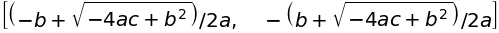

In [7]:
solve(a*x**2+b*x+c,x)

The solution is not always real. The imaginary unit 1 is denoted by `I` in `sympy`.

In [8]:
I**2

We can use the `solve` function to find solutions of an equation system. We have to put all our equations arranged to zero into a list. The variables as well. For example, let us solve the following system for $x$ and $y$:

$$y=x^2+ax-4b$$
$$y=x-b$$

The first equation is linear in x, therefore, we expect two solution pairs (a parabole dissects a line in at most two points).

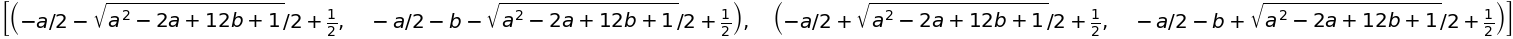

In [9]:
solve([x**2 + a*x -4*b - y, x - y - b],[x,y]) # solving a system of equations


The output of the `solve` function is now a list, whose elements contain the $(x,y)$ pairs that solve the equation system.

## Substitution and evaluation

In many cases, we can introduce an abbreviation for some pieces in a calculation that occur several times. After the calculations, we have to put these abbreviated pieces back into the results. Similar operations are obtainable with the `subs()` method, that can be used for any `sympy` objects. Let us see an example! Let the result of a calculcation be $x^2+ax-y$, and let us store it in the variable `sg`.

In [10]:
sg=x**2 + a*x - y
sg

Let us suppose now, that $y$ was used to substitue the expression $x^3$, and we want to write $x^3$ back. The `subs` method can then be used in the following way: 

In [11]:
sg.subs(y,x**3)

The last step of calculation is evaulating our results numerically. This can be done with the `evalf()` method of `sympy`. For example:

In [12]:
foo=sqrt(8)

In [13]:
foo.evalf()

Calling `evalf` with only one integer argument, we can influence the numerical precision of the result.

In [14]:
foo.evalf(40)

If the expression contains more than one unknowns, then we can list these as a dictionary into the `subs` keyword argument of `evalf`.

In [15]:
foo2=sin(2*x)+cos(y)

In [16]:
foo2.evalf(12,subs={x:0.5,y:0.3})

## Function analysis

One of the best advantages of `sympy` is that it makes it possible to perform some simple operations from analysis in Python. Below we show some simple functions, but these are far from a complete picture. For example, let us calculate the following limits with the help of the `limit` function:
$$\lim_{x\rightarrow 0}\frac{\sin x}{x}=? $$ and $$\lim_{x\rightarrow \infty}\frac{1}{1+\mathrm{e}^{-x}}=? $$

In [17]:
limit(sin(x)/x,x,0)

If we want the limit in the infinity, we can achieve it by using the `oo` symbol.

In [18]:
limit(1/(1+exp(-x)),x,oo)

The derivative of expressions can be found with the `diff` function. The first derivative of $\sin(x)$ with respect to $x$ is:

In [19]:
diff(sin(x),x)

The second derivative:

In [20]:
diff(sin(x),x,x)

or maybe a simpler way:

In [21]:
diff(sin(x),x,2)

Of course, partial derivatives are also available.

In [22]:
diff(sin(x)*cos(y),x,y)

Partial derivatives of higher order is a generalization of simple derivatives.

In [23]:
diff(sin(x)*cos(y),x,2,y,3)

The `integrate` function calculated definite and indefinite integrals.

Let us search for the primitive function of $x^2$.

In [24]:
integrate(x**2,x)

The
$$\int_0^3 x^2\mathrm{d}x$$ definite integral can be evaluated in the following way:

In [25]:
integrate(x**2,(x,0,3))

Of course, during the integration, we might have other parameters:

In [26]:
integrate(x**2+y**3,(x,0,3))

Multivariate integrals are evaluated by writing the variables (in the case of definite integrals, the limits) after each other. 

The $$\int x^2+y^3 \mathrm{d}x\mathrm{d}y $$ definite integral:

In [27]:
integrate(x**2+y**3,x,y)

The
$$\int_0^3\int_{-3}^{5} x^2+y^3 \mathrm{d}x\mathrm{d}y $$ definite integral:

In [28]:
integrate(x**2+y**3,(x,0,3),(y,-3,5))

## Plotting analytical functions

When we determine analytical functions with the `sympy` module, we can also plot them. `sympy` uses the already familiar `matplotlib` functions, **but** with a slightly **different syntax**. The main difference between the two packages is that matplotlib can only handle striclty numerical data, therefore, the user has to make the sampling and the evaluation of the points before the plot, while `sympy` uses the analytical expression itself, and it makes the sampling and evaluation steps, and creates the numerical datastructures in the background. In the following section, we are going to use the `plotting` submodule of the `sympy` module for displaying analytical curves and functions.

In [29]:
from sympy.plotting import * # loading the module

The `plot` function can be used for displaying univariate scalar expressions.

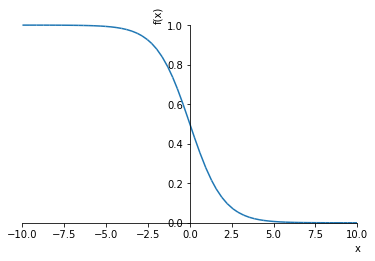

In [30]:
plot(1/(exp(x)+1),(x,-10,10))

The `plot_parametric` functions serves to display general parametric curves.

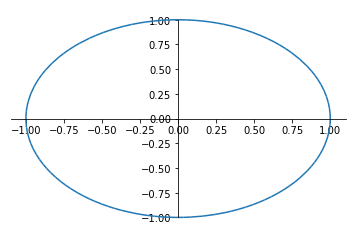

In [31]:
plot_parametric(sin(x),cos(x),(x,0,2*pi))

Spatial curves can be displayed using the `plot3d_parametric_line` function.

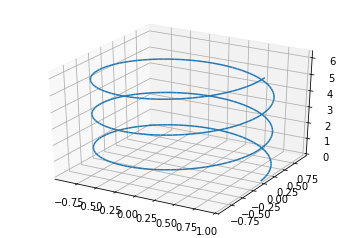

In [32]:
plot3d_parametric_line(cos(3*x),sin(3*x),x,(x,0,2*pi))

Spatial surfaces might be displayed by the `plot3d` and the `plot3d_parametric_surface`command.

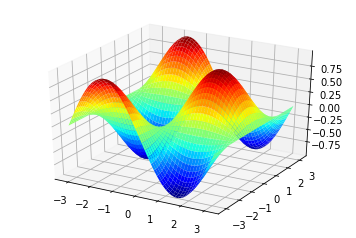

In [33]:
plot3d(sin(x)*cos(y),(x,-pi,pi),(y,-pi,pi))

In [34]:
 u, v = symbols('u v')

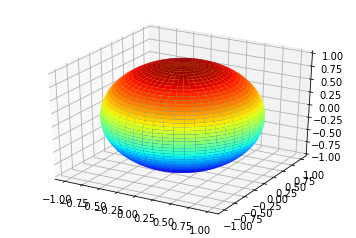

In [35]:
plot3d_parametric_surface(sin(v)*cos(u),sin(v)*sin(u),cos(v), (u, 0, 2*pi), (v, 0, pi))

## Simplification

The `symmpy` module has many methods for simplifying expressions. Let us now have a look at the simplest ones.

### General case, the `simplify` function

The most general simplifying function is `simplify`, which aims to reduce the expression in its argument to its most compressed form without further specifications. Some examples follow.

In [36]:
simplify(sin(x)**2 + cos(x)**2)

In [37]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

We've seen some successful calls, let us now have a look at a failed one! `simplify` cannot deal with the next expression, though it is clear that it could be rewritten.

In [38]:
simplify(x**2 + 2*x +1)

The cause for this phenomenon is that simplification is algorithmically ill defined. If we tell the function what to look for, it might be more efficiont. There are some specific functions that help us in certain simplification or rewriting tasks.

#### Polynomial and rational expressions

### Polinomiális és racionális kifejezések

The `expand()` function expands polynomials in its most simple case.

In [39]:
expand((x+y)**3)

The `factor()` function is in some sense the opposite of the `expand()` function. It aims to create the shortest possible multiplication form from the given expression, for example the previous expression which has been left untouched by `simplify`:

In [40]:
factor(x**2 + 2*x +1)

yields the expected simpler form.

For more general multivariate polynomial expressions it happens that we would like to order the polynomial according to a vertain variable. The `collect()` function might be used for this.

In [41]:
expr=x*y + x - 3 + 2*x**2 - z*x**2 + x**3

In [42]:
collect(expr,x)

In [43]:
xek=collect(expr,x)

The `coeff` method gives the coefficients corresponding to the appropriate exponent.

In [44]:
xek.coeff(x,2)

The `cancel()` function simplifies rational expressions, that are polynomial over polynomial shaped.

In [45]:
cancel((x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1))

The `apart()` function gives the [partial fraction decomposition](https://en.wikipedia.org/wiki/Partial_fraction_decomposition) of a rational expression.

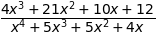

In [46]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

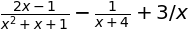

In [47]:
apart(expr)

#### Functions containing trigonometric functions

There are two methods for hadling trigonometric expressions.

The `trigsimp()` tries to shorten the expressions by using trigonometric equalities.

In [48]:
expr=sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4
expr

In [49]:
trigsimp(expr)

The `expand_trig()` function creates expressions with the simplest possible arguments. Of course, the result might be much longer than the original expression.

In [50]:
expand_trig(cos(4*x))

### Rewrite 

The `rewrite` method enables us to rewrite `sympy` expressions in a very general way. It can be used on trigonometric functions, for example.

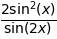

In [51]:
tan(x).rewrite(sin)

or transforming trigonometric expressions into exponential functions.

In [52]:
sin(x).rewrite(exp)

But some other examples are:

In [53]:
factorial(x).rewrite(gamma) # factorial and gamma function

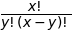

In [54]:
binomial(x,y).rewrite(factorial) # binomial coefficients and factorial

`sympy` has many more possibilities for rewriting formulae, we've only had a look at a small fraction of them so far. For further information it's worth to browse the [documentation](http://docs.sympy.org/latest/index.html).

## Analytical linear algebra

We can solve linear algebraic problems with `sympy`. Such problems use the `Matrix` class of the `sympy` module. **Attention**, this is not the `matrix` class of the `numpy` module, or its `array` class.

Next, we are going to have a look at creating symbolic matrices, and their operations.

Let us create a 2x2 matrix!

In [55]:
M=Matrix([[0, -x*exp(I*y)],
          [-x*exp(-I*y), 0]])
M

⎡              ⅈ⋅y⎤
⎢   0      -x⋅ℯ   ⎥
⎢                 ⎥
⎢    -ⅈ⋅y         ⎥
⎣-x⋅ℯ         0   ⎦

In [56]:
B=Matrix([[1,2],
          [4,5]])
B

⎡1  2⎤
⎢    ⎥
⎣4  5⎦

The element of the matrix `M` contain `sympy` variable themselves, while `B` matrix only contains numerical values. The two matrices behave as we would expect, we can add them up:

In [57]:
M+B

⎡                    ⅈ⋅y    ⎤
⎢      1        - x⋅ℯ    + 2⎥
⎢                           ⎥
⎢     -ⅈ⋅y                  ⎥
⎣- x⋅ℯ     + 4       5      ⎦

or we can multiply them:

In [58]:
M*B

⎡      ⅈ⋅y        ⅈ⋅y ⎤
⎢-4⋅x⋅ℯ     -5⋅x⋅ℯ    ⎥
⎢                     ⎥
⎢    -ⅈ⋅y         -ⅈ⋅y⎥
⎣-x⋅ℯ       -2⋅x⋅ℯ    ⎦

The result of the multiplicaction depends on the order of the matrices.

In [59]:
B*M

⎡      -ⅈ⋅y       ⅈ⋅y ⎤
⎢-2⋅x⋅ℯ       -x⋅ℯ    ⎥
⎢                     ⎥
⎢      -ⅈ⋅y        ⅈ⋅y⎥
⎣-5⋅x⋅ℯ      -4⋅x⋅ℯ   ⎦

The power operation is also not elementwise, but uses the power of matrices!

In [60]:
M**2

⎡ 2    ⎤
⎢x   0 ⎥
⎢      ⎥
⎢     2⎥
⎣0   x ⎦

We can determine the inverse with the `**` operator.

In [61]:
B**(-1)

⎡-5/3  2/3 ⎤
⎢          ⎥
⎣4/3   -1/3⎦

There are some functions that can be used for creating special matrices. `eye()` makes an identity matrix of arbitrary size.

In [62]:
eye(3)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

The `diag()` function might be used for creating matrices with diagonal structure.

In [63]:
diag(sin(x),y,z)

⎡sin(x)  0  0⎤
⎢            ⎥
⎢  0     y  0⎥
⎢            ⎥
⎣  0     0  z⎦

To solve some linear algebraic probblems, we have to have row and column vectors. `Matrix` class can be used for them, too.

In [64]:
v=Matrix([[1,2]])
v

[1  2]

In [65]:
w=Matrix([[1],[2]])
w

⎡1⎤
⎢ ⎥
⎣2⎦

Matrix-vector multiplication goes as we'd expect.

In [66]:
B*w

⎡5 ⎤
⎢  ⎥
⎣14⎦

In [67]:
v*B

[9  12]

Linear equation systems given by matrices and vectors can be solved by the `solve()` method of the `Matrix` class. For example the above defined `B` and `w` variables give the following equation:

$$Bx=w$$ that we can solve for $x$:

In [68]:
B.solve(w)

⎡-1/3⎤
⎢    ⎥
⎣2/3 ⎦

The determinant of a matrix is `det`, the trace of a matrix is `trace`.

In [69]:
M.det()

In [70]:
B.trace()

The transpose or adjoint of a matrix is `.T`, or `.H`.


In [71]:
M.T

⎡             -ⅈ⋅y⎤
⎢   0     -x⋅ℯ    ⎥
⎢                 ⎥
⎢    ⅈ⋅y          ⎥
⎣-x⋅ℯ        0    ⎦

In [72]:
M.H

⎡              _  ⎤
⎢            ⅈ⋅y _⎥
⎢   0      -ℯ   ⋅x⎥
⎢                 ⎥
⎢     _           ⎥
⎢  -ⅈ⋅y _         ⎥
⎣-ℯ    ⋅x     0   ⎦

In the above results, the overbar denotes the complex conjugate.

For investigating eigenvalue and eigenvector problems, we can use the `eigenvals()` and `eigenvects()` methods. `eigenvals()` returns a dictionary that contains the eigenvalues as keys, and the value denotes the degeneracy of the eigenvalue.

In [73]:
M.eigenvals()

`eigenvects()` returns the eigenvalues, their multiplicity and the corresponding eigenvectors.

In [74]:
M.eigenvects()

⎡⎛       ⎡⎡ ⅈ⋅y⎤⎤⎞  ⎛      ⎡⎡  ⅈ⋅y⎤⎤⎞⎤
⎢⎜-x, 1, ⎢⎢ℯ   ⎥⎥⎟, ⎜x, 1, ⎢⎢-ℯ   ⎥⎥⎟⎥
⎢⎜       ⎢⎢    ⎥⎥⎟  ⎜      ⎢⎢     ⎥⎥⎟⎥
⎣⎝       ⎣⎣ 1  ⎦⎦⎠  ⎝      ⎣⎣  1  ⎦⎦⎠⎦